In [2]:
from glob import  glob
from pathlib import Path

import numpy

from become_yukarin.config.config import create_from_json as create_config
from become_yukarin.config.sr_config import create_from_json as create_sr_config
from become_yukarin.dataset.dataset import AcousticFeatureProcess
from become_yukarin.dataset.dataset import WaveFileLoadProcess
from become_yukarin.param import Param
from become_yukarin import SuperResolution
from become_yukarin import AcousticConverter

import matplotlib.pyplot as plt
from IPython.display import Audio
%matplotlib inline

In [9]:
model_path = Path('./dat/model/yukari_1st/predictor_95000.npz')
config_path = Path('./dat/model/yukari_1st/config.json')
config = create_config(config_path)
voice_changer = AcousticConverter(config, model_path, gpu=0)

In [11]:
model_path = Path('./dat/model/yukari_2nd/predictor_120000.npz')
config_path = Path('./dat/model/yukari_2nd/config.json')
sr_config = create_sr_config(config_path)
super_resolution = SuperResolution(sr_config, model_path, gpu=0)

In [18]:
p = './test_data/test-deep-learning-yuduki-yukari.wav'
wave_in = voice_changer._wave_process(str(p))
f_in = voice_changer._feature_process(wave_in)
f_low = voice_changer.convert_to_feature(f_in)
s_high = super_resolution.convert(f_low.spectrogram.astype(numpy.float32))

In [23]:
p_true ='./output/yukari_2nd/test-deep-learning-yuduki-yukari.wav'
w_true = voice_changer._wave_process(str(p_true))
f_true = voice_changer._feature_process(w_true)

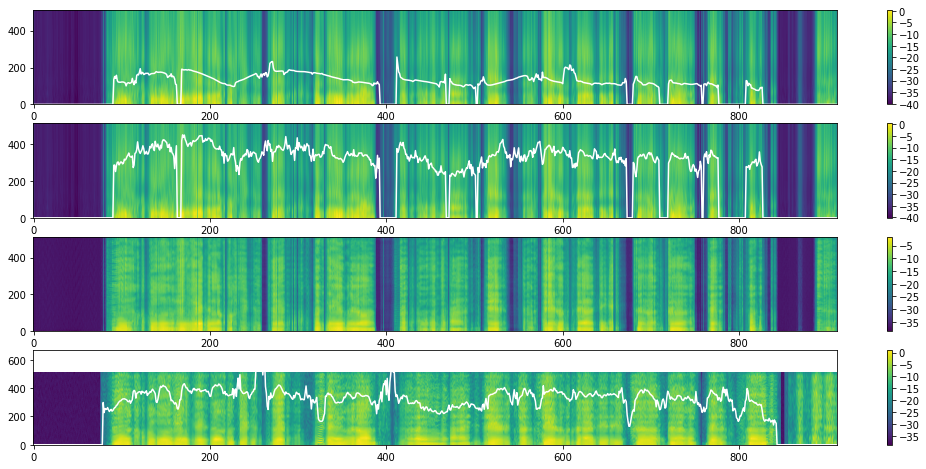

In [25]:
plt.figure(figsize=[18, 8])

plt.subplot(4, 1, 1)
plt.imshow(numpy.log(f_low.spectrogram).T, aspect='auto', origin='reverse')
plt.plot(f_in.f0, 'w')
plt.colorbar()

plt.subplot(4, 1, 2)
plt.imshow(numpy.log(f_low.spectrogram).T, aspect='auto', origin='reverse')
plt.plot(f_low.f0, 'w')
plt.colorbar()

plt.subplot(4, 1, 3)
plt.imshow(numpy.log(s_high).T, aspect='auto', origin='reverse')
plt.colorbar()

plt.subplot(4, 1, 4)
plt.imshow(numpy.log(f_true.spectrogram).T, aspect='auto', origin='reverse')
plt.plot(f_true.f0, 'w')
plt.colorbar()

In [29]:
rate = sr_config.dataset.param.voice_param.sample_rate
wave = super_resolution(s_high, acoustic_feature=f_low, sampling_rate=rate)
Audio(data=wave.wave , rate=rate)

In [27]:
rate

22050